## Data Analysis in Python: Introduction to Pandas

Pandas is built on top of numPy, and is designed to eliminate the need for writing loops for any filtering or aggregation work. It is implemented in C, so is around 15x faster than base python.

Key Features
* Easy handling of ***missing data.*** (`dropna, fillna, ffill, isnull, notnull`)
* Simple ***mutations*** of tables (add/remove columns)
* Easy ***slicing*** of data (fancy indexing and subsetting)
* Automatic ***data alignment*** (by index)
* Powerful ***split-apply-combine*** (`groupby`)
* Intuitive ***merge/join*** (`concat, join`)
* Reshaping and ***Pivoting*** (`stack, pivot`)
* ***Hierarchical Labeling*** of axes indices
* Robust ***I/O tools*** to work with csv, Excel, flat files, ***databases and HDFS***
* Integrated ***Time Series*** Functionality
* Easy plotting (`plot`)

Stack Overflow page for handling big data workflows in Pandas [link](http://stackoverflow.com/questions/14262433/large-data-work-flows-using-pandas)

In [ ]:
import os
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

In [ ]:
np.array?

## Using the `array()` function

In [ ]:
arr_1d = np.array((1, 2, 3))

In [ ]:
arr_1d.shape

In [ ]:
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]); arr_2d

In [ ]:
arr_2d.shape

In [ ]:
arr_3d = array([arr_2d, arr_2d])

In [ ]:
arr_3d.shape

## Using generation functions

In [ ]:
np.arange(16)

In [ ]:
np.arange(16).reshape(4, 4)

## Using random numbers

In [ ]:
arr_1d = np.random.randint(1, 100, 16)

In [ ]:
arr_2d = np.random.randint(0, 1000, 16).reshape(4, 4)

In [ ]:
np.random.randn(10).round(2)

In [ ]:
np.random.randn(30).reshape(5, 6).round(2)

## Subsetting (get a number or many numbers from an array)

In [ ]:
arr_1d

In [ ]:
arr_1d[::2]

In [ ]:
arr_2d

In [ ]:
# Getting a single number
arr_2d[3, 0]

In [ ]:
arr_2d[0, :]

In [ ]:
arr_2d[:, 0]

In [ ]:
arr_2d[:2, :]

In [ ]:
arr_2d[:, 2:]

In [ ]:
arr_2d[2:4, 2:4]

## Subsetting with Booleans

In [ ]:
arr_1d

In [ ]:
arr_1d > 50

In [ ]:
arr_1d[arr_1d > 50]

In [ ]:
arr_2d

In [ ]:
arr_2d % 2 == 0

In [ ]:
arr_2d[arr_2d % 2 == 0]

## Mathematical Operations

In [ ]:
print arr_1d
arr_1d + arr_1d

In [ ]:
print arr_2d
arr_2d + arr_2d

## Math Functions

In [ ]:
np.sqrt(arr_1d).round(2)

In [ ]:
np.log(arr_2d).round(2)

## Array Attribues and Methods

- commonly used: `reshape, round... `

In [ ]:
array([True, True, False, True]).all()

In [ ]:
array([True, True, False, True]).any()

In [ ]:
arr_1d.argmax()

In [ ]:
arr_1d.argsort()

In [ ]:
arr_1d[arr_1d.argsort()]

In [ ]:
arr_1d

In [ ]:
arr_1d.clip(20, 90)

---
# Pandas

http://pandas.pydata.org/

---

- A fast and efficient DataFrame object for data manipulation with integrated indexing;
- Tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format;
- Intelligent data alignment and integrated handling of missing data: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form;
- Flexible reshaping and pivoting of data sets;
- Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
- Columns can be inserted and deleted from data structures for size mutability;
- Aggregating or transforming data with a powerful group by engine allowing split-apply-combine operations on data sets;
- High performance merging and joining of data sets;
- Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
- Time series-functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;
- Highly optimized for performance, with critical code paths written in Cython or C.
- Python with pandas is in use in a wide variety of academic and commercial domains, including Finance, Neuroscience, Economics, Statistics, Advertising, Web Analytics, and more.

---

In [ ]:
from pandas import Series, DataFrame

In [ ]:
print pd.__version__

In [ ]:
ls

### 2.2 Importing a CSV File

Reading a CSV is as simple as calling the read_csv function. By default, the `read_csv` function expects the column separator to be a comma, but you can change that using the sep parameter.

Syntax: `pd.read_csv(filepath, sep=, header=, names=, skiprows=, na_values= ... )`

### Inspect file without importing it

In [ ]:
!wc -l train.csv

In [ ]:
!head -10 train.csv 

In [ ]:
df_titanic = pd.read_csv('train.csv')

In [ ]:
type(df_titanic)

In [ ]:
df_titanic.tail(2)

---

## 3. Support for SQL Databases

pandas also has some support for reading/writing DataFrames directly from/to a database. 

You'll typically just need to pass a connection object to the `read_frame` or `write_frame` functions within the pandas.io module.

***Note*** `write_frame` executes as a series of `INSERT INTO` statements and thus trades speed for simplicity. If you're writing a large DataFrame to a database, it might be quicker to write the DataFrame to CSV and load that directly using the database's file import arguments.

In [ ]:
[x for x in os.listdir(os.getcwd()) if 'db' in x]

In [ ]:
pd.read_sql?

In [ ]:
from pandas.io import sql
import sqlite3 

conn = sqlite3.connect('towed.db')
query = "SELECT * FROM towed WHERE make = 'FORD';"

results = pd.read_sql(query, con=conn)
print results.head()

In [ ]:
pd.read_sql("SELECT distinct make, count(*) from towed group by 1 order by 2 desc limit 10", conn)

---

Read: 

1. Homepage http://www.sqlalchemy.org/
2. Engines http://docs.sqlalchemy.org/en/latest/core/engines.html

---

## 4. Reading from the Clipboard!

This is as straight forward as it ought to be.

Example: `df_2 = pd.read_clipboard(); df_2.head()`

---

---
## 1. Series
It is a 1-d array of data (similar to an array/list/column in a table) with an associated **labeled _index_.**

 It can be created in the same way as a NumPy array is created

> Syntax: `Series(data=, index=, dtype=, name=)`

In [ ]:
from pandas import Series, DataFrame, read_csv

- Using an array

In [ ]:
x_random = np.random.randn(10).round(2)
print x_random

In [ ]:
s_random = Series(x_random)
# no index specified, numeric will be automatically generated
print type(s_random)
s_random

In [39]:
my_series = Series(x_random, index=list('aabbbccdef'))
# passing an index specifically
my_series

a   -0.05
a    0.95
b    1.10
b    2.43
b    0.13
c    1.69
c   -1.39
d    0.90
e    1.05
f   -0.19
dtype: float64

<big>
- Using a list, tuple or dict

In [ ]:
dict_1 = {v: k for k, v in zip(np.random.random(10).round(2), list('abcdefghij'))}

In [ ]:
Series(dict_1)

In [ ]:
Series(data=[1, 2, 3], 
       index=list('abc'), 
       name='Series_1', dtype=float)

In [37]:
Series(data=(1, 2, 3), index=list('abc'), 
       name='Series_1', dtype=np.int64)

a    1
b    2
c    3
Name: Series_1, dtype: int64

In [38]:
Series({'a': 1, 'b': 2, 'c':3}, dtype=str)

a    1
b    2
c    3
dtype: object

---
## Series Attributes

In [40]:
my_series.values

array([-0.05,  0.95,  1.1 ,  2.43,  0.13,  1.69, -1.39,  0.9 ,  1.05, -0.19])

In [41]:
my_series.index

Index([u'a', u'a', u'b', u'b', u'b', u'c', u'c', u'd', u'e', u'f'], dtype='object')

In [42]:
type(my_series.index)

pandas.indexes.base.Index

### Modifying the Index

In [43]:
my_series.index = list('abcde' * 2)

In [44]:
my_series

a   -0.05
b    0.95
c    1.10
d    2.43
e    0.13
a    1.69
b   -1.39
c    0.90
d    1.05
e   -0.19
dtype: float64

In [45]:
my_series.name = 'ser1'

In [46]:
my_series

a   -0.05
b    0.95
c    1.10
d    2.43
e    0.13
a    1.69
b   -1.39
c    0.90
d    1.05
e   -0.19
Name: ser1, dtype: float64

--- Convert a dictonary to a Series, using the **keys** of the dictionary as its **index**.

---
**Task 1:** Declare a series using this data, 
```
{'ham': 1, 'eggs': 3, 'bacon': 2, 'coffee': 1, 'toast': 0.5, 'jam': 0.2}
```
- The menu options should form the index.
- The series should be called 'menu'

---------------------------------------------------------------------------------------------------------------------

## 1.3 Subsetting a Series

<big>

The different methods of subsetting that we've seen so far include

- Using slices or positional indexers (for lists and arrays)
- Using keys (for dictionaries)
- Using bools (for arrays)

For the Pandas Series, we can use either of the above strategies, leveraging specialized methods for pulling data from a Series. 

In [48]:
my_series = Series(np.random.randn(5).round(2), index = list('abcde'))
my_series

a    1.05
b   -0.45
c    0.20
d   -0.86
e   -0.92
dtype: float64

In [51]:
# One Label
my_series['a']

1.05

In [52]:
# List of Labels
my_series[['a', 'b']] 

a    1.05
b   -0.45
dtype: float64

In [53]:
# Label Slice
my_series['b':'d']

b   -0.45
c    0.20
d   -0.86
dtype: float64

In [58]:
my_series['b':'d']

b   -0.45
c    0.20
d   -0.86
dtype: float64

In [59]:
my_series[1:4]

b   -0.45
c    0.20
d   -0.86
dtype: float64

In [55]:
# positional slicing
my_series[:3]

a    1.05
b   -0.45
c    0.20
dtype: float64

In [56]:
my_series[:2]

a    1.05
b   -0.45
dtype: float64

In [57]:
my_series[::-2]

e   -0.92
c    0.20
a    1.05
dtype: float64

## Series Slicing Methods

    loc and iloc
    at and iat
    ix

In [60]:
# LABEL BASED INDEXER METHOD
my_series.loc?

In [61]:
my_series.loc[['a', 'c', 'e']]

a    1.05
c    0.20
e   -0.92
dtype: float64

In [65]:
# INTERGER BASED INDEXER METHOD
my_series.iloc?

In [78]:
my_series.iloc[2:4]

c    0.20
d   -0.86
dtype: float64

In [67]:
# MIXED LABELS and INTEGERS BASED INDEXER METHOD
my_series.ix?

In [68]:
my_series.ix['a':'c']

a    1.05
b   -0.45
c    0.20
dtype: float64

In [69]:
my_series.ix[0:4]

a    1.05
b   -0.45
c    0.20
d   -0.86
dtype: float64

## Boolean Series and Indexing

- Use conditional operators to create an equal-length Boolean series
- Subset the series using this boolean inside square brackets

In [79]:
ser_x = my_series.copy()

In [80]:
ser_x

a    1.05
b   -0.45
c    0.20
d   -0.86
e   -0.92
dtype: float64

In [81]:
%%timeit

l_x = []
for i in ser_x:
    if i > 0:
        l_x.append(i)

The slowest run took 4.13 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 18.2 µs per loop


In [83]:
%%timeit

l_x = ser_x[ser_x > 0]

1000 loops, best of 3: 787 µs per loop


### pd.Series.ix?

``.ix[]`` supports mixed integer and label based access. It is
primarily label based, but will fall back to integer positional
access

In [84]:
my_series.ix[0:2]

a    1.05
b   -0.45
dtype: float64

In [85]:
my_series.ix['c':'e']

c    0.20
d   -0.86
e   -0.92
dtype: float64

### Series Methods for finding the biggest values

In [86]:
my_series.max()

1.05

In [87]:
my_series.idxmax()

'a'

In [89]:
my_series.idxmin()

'e'

In [90]:
my_series.min()

-0.92000000000000004

---------------------------------------------------------------------------------------------------------------------

## 1.4 Array Operations on a Series
Array operations on the Series preserves the index-value links.

In [91]:
np.sqrt(Series(range(4, 21, 4)))

0    2.000000
1    2.828427
2    3.464102
3    4.000000
4    4.472136
dtype: float64

In [94]:
print my_series
print Series({'c': 1, 'd': 0.14, 'e':10, 'f': 2, 'g':-0.5})

print my_series + Series({'c': 1, 'd': 0.14, 'e':10, 'f': 2, 'g':-0.5})

a    1.05
b   -0.45
c    0.20
d   -0.86
e   -0.92
dtype: float64
c     1.00
d     0.14
e    10.00
f     2.00
g    -0.50
dtype: float64
a     NaN
b     NaN
c    1.20
d   -0.72
e    9.08
f     NaN
g     NaN
dtype: float64


In [95]:
my_series / 2

a    0.525
b   -0.225
c    0.100
d   -0.430
e   -0.460
dtype: float64

Methods that apply to dicts are also valid on a Series.

---------------------------------------------------------------------------------------------------------------------

### 1.5 Check if an item exists in a Series

In [96]:
'boo' in my_series

False

---
## THE `.isin()` method

In [97]:
pls = Series(['c', 'py', 'java', 'scala'])

In [98]:
pls.isin(['c', 'py'])

0     True
1     True
2    False
3    False
dtype: bool

In [99]:
pls[pls.isin(['java', 'py'])]

1      py
2    java
dtype: object

---------------------------------------------------------------------------------------------------------------------

## Reindexing

In [100]:
my_series

a    1.05
b   -0.45
c    0.20
d   -0.86
e   -0.92
dtype: float64

In [101]:
my_series[['a', 'y', 'b', 'd', 'e', 'x']]

a    1.05
y     NaN
b   -0.45
d   -0.86
e   -0.92
x     NaN
dtype: float64

In [104]:
my_series.reindex(['a', 'y', 'b', 'd', 'e', 'x'])

a    1.05
y     NaN
b   -0.45
d   -0.86
e   -0.92
x     NaN
dtype: float64

### 1.6 Detect Missing Values


- Missing values appear as NaN. Funtions _isnull_ and _notnull_ are used to detect missings.
- They both produce booleans that can be used for subsetting

In [105]:
cities = Series(data = [18, None, 5, None, 13], 
                index=['DEL', 'BOM', 'BLR', 'DXB', 'BKK'])

In [108]:
zip(cities, cities.isnull())

[(18.0, False), (nan, True), (5.0, False), (nan, True), (13.0, False)]


In [109]:
zip(cities, cities.notnull())

[(18.0, True), (nan, False), (5.0, True), (nan, False), (13.0, True)]

In [110]:
cities[cities.isnull()]

BOM   NaN
DXB   NaN
dtype: float64

In [111]:
cities[cities.notnull()]

DEL    18.0
BLR     5.0
BKK    13.0
dtype: float64

In [112]:
index2 = ['a', 'd', 'e', 'f', 'g']
my_series2 = my_series[index2]
my_series2

a    1.05
d   -0.86
e   -0.92
f     NaN
g     NaN
dtype: float64

In [113]:
my_series2[my_series2.notnull()]

a    1.05
d   -0.86
e   -0.92
dtype: float64

In [114]:
my_series2[my_series2.isnull()]

f   NaN
g   NaN
dtype: float64

In [115]:
my_series2.fillna(-999)

a      1.05
d     -0.86
e     -0.92
f   -999.00
g   -999.00
dtype: float64

In [118]:
cities.fillna(method='bfill')

DEL    18.0
BOM     5.0
BLR     5.0
DXB    13.0
BKK    13.0
dtype: float64

## Difference between None and NaN

<big><br>

- `NaN` is a mathematical entity
- `None` is for missing data

In [119]:
type(np.nan)

float

In [121]:
bool(np.nan)
# Truthiness value of np.nan is True

True

In [122]:
type(None)

NoneType

In [123]:
bool(None)

False

---

<big>

Task: Generate a Series of 150 ages with a mean of 35 years. Set every fifteenth value to missing. Find the nexw mean. Fill the missing data with (a) mean (b) median, and report the new means

hint: use `np.random.randn`

In [125]:
s_1 = Series(np.random.randn(150))

In [126]:
s_1.mean()

0.03058183662967978

In [127]:
s_1[::15] = np.nan

In [128]:
s_1.mean()

0.044823121736483035

In [129]:
s_1.median()

0.033316790557533074

In [132]:
s_1.fillna(s_1.mean()).mean()

0.044823121736483056

In [133]:
s_1.fillna(s_1.median()).median()

0.033316790557533074

In [137]:
from scipy.stats import norm
x = norm.rvs(35, 15, 150).astype(int)

---

### 1.7 Alignment in Arithmetic Operations
Series with different indexes will be automatically aligned, and NaNs induced in locations where data is not found. 

The indexes are _unioned_.

> Think of binary operations as outer joins. 

In [143]:
my_series

a    1.05
b   -0.45
c    0.20
d   -0.86
e   -0.92
dtype: float64

In [144]:
my_series2 = Series(range(5), index=list('cdefg'))

In [145]:
my_series2

c    0
d    1
e    2
f    3
g    4
dtype: int64

In [146]:
# Series have different indexes
# The indexes are UNION'd
# Missing values used where there isnt a match.
my_series + my_series2

a     NaN
b     NaN
c    0.20
d    0.14
e    1.08
f     NaN
g     NaN
dtype: float64

In [149]:
my_series > my_series2

ValueError: Can only compare identically-labeled Series objects

---
## Series Methods - Important

In [150]:
# Describe method on char series
Series(list('Dogs are descended from wolves.')).describe()

count     31
unique    17
top        e
freq       5
dtype: object

In [151]:
# Describe method on numeric series
ser_x = Series(np.random.normal(0, 1, 10000))

In [173]:
ser_x.describe().loc[['min', 'max']]

min   -4.099925
max    3.632098
dtype: float64

In [153]:
df_x = pd.read_csv('train.csv')

- `value_counts()` for frequency tables

In [155]:
df_x['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<big>
this is equivalent to `SELECT distinct Embarked, count(*) from titanic group by 1`

- `astype()` for type conversion

In [157]:
df_x['PassengerId'].head().astype(str)

0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: object

- `map()` for applying a function to each element of a series.

In [162]:
df_x['Name'].head().map(lambda x: (('Mrs' in x) or ('Miss' in x)))

0    False
1     True
2     True
3     True
4    False
Name: Name, dtype: bool

In [164]:
df_x['Sex'].head().map(lambda x: x.upper())

0      MALE
1    FEMALE
2    FEMALE
3    FEMALE
4      MALE
Name: Sex, dtype: object

In [165]:
df_x['Name'].head().map(lambda x: len(x))

0    23
1    51
2    22
3    44
4    24
Name: Name, dtype: int64

- `idxmax()` for finding where the maximum value occured

In [172]:
fares = Series(df_x['Fare'].values, index=df_x['Name'].values)
print fares.head()
print fares.idxmax(), fares.idxmin()

Braund, Mr. Owen Harris                                 7.2500
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    71.2833
Heikkinen, Miss. Laina                                  7.9250
Futrelle, Mrs. Jacques Heath (Lily May Peel)           53.1000
Allen, Mr. William Henry                                8.0500
dtype: float64
Ward, Miss. Anna Leonard, Mr. Lionel


- `.sort_values()` to sort a series

In [174]:
fares.sort_values(ascending=False)[:5]

Cardeza, Mr. Thomas Drake Martinez    512.3292
Ward, Miss. Anna                      512.3292
Lesurer, Mr. Gustave J                512.3292
Fortune, Miss. Alice Elizabeth        263.0000
Fortune, Mr. Mark                     263.0000
dtype: float64

- `plot()` to visualize data

In [175]:
import seaborn as sns

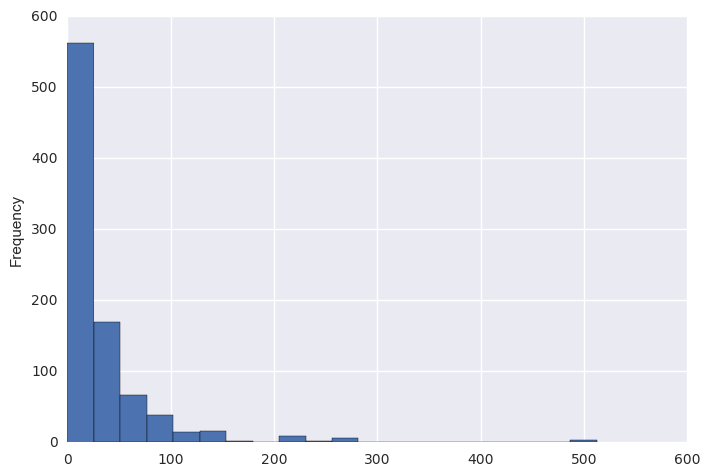

In [178]:
fares.plot.hist(bins=20);

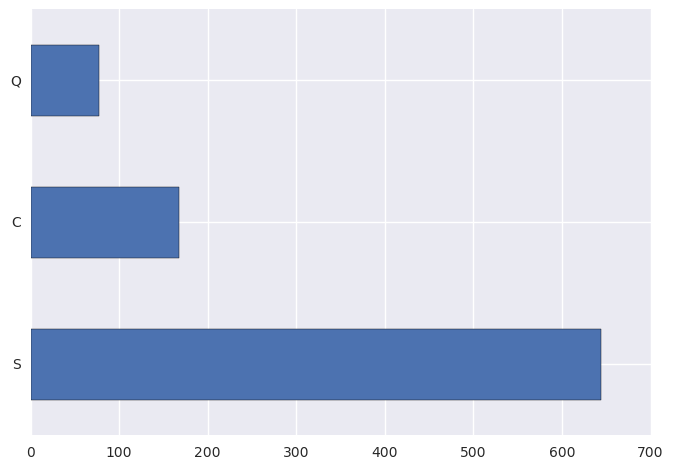

In [183]:
df_x['Embarked'].value_counts().plot.barh();

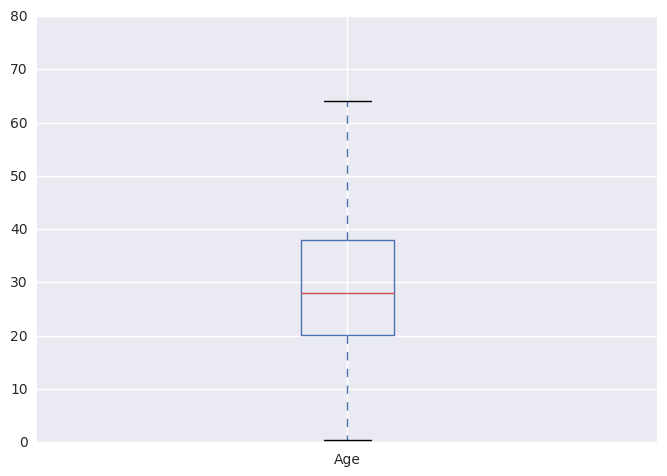

In [185]:
df_x.Age.plot.box();

- `replace()` method for replacing values using a dict

In [203]:
fruits = Series(['apples', 'oranges', 'peaches', 'mangoes'])

In [206]:
rep = {'apples':'bananas', 'peaches':'grapes'}

In [208]:
fruits.replace(rep)

0    bananas
1    oranges
2     grapes
3    mangoes
dtype: object

- `duplicated()` and `drop_duplicates()` creates a boolean to indicate where duplicates occured

In [209]:
zip(Series(list('ABCDEFABGHIABCD')), Series(list('ABCDEFABGHIABCD')).duplicated())

[('A', False),
 ('B', False),
 ('C', False),
 ('D', False),
 ('E', False),
 ('F', False),
 ('A', True),
 ('B', True),
 ('G', False),
 ('H', False),
 ('I', False),
 ('A', True),
 ('B', True),
 ('C', True),
 ('D', True)]

In [211]:
ser_with_dups = Series(list('ABCDEFABGHIABCD'))

In [212]:
ser_with_dups.drop_duplicates()

0     A
1     B
2     C
3     D
4     E
5     F
8     G
9     H
10    I
dtype: object

In [213]:
ser_with_dups

0     A
1     B
2     C
3     D
4     E
5     F
6     A
7     B
8     G
9     H
10    I
11    A
12    B
13    C
14    D
dtype: object

In [214]:
ser_with_dups.drop_duplicates(inplace=True)

In [215]:
ser_with_dups

0     A
1     B
2     C
3     D
4     E
5     F
8     G
9     H
10    I
dtype: object

---
<center>

# $DataFrame$

</center>
---

It is 2-D table like data structure that has both a row and column index. Similar to the R data frame. Each column can be a different dtype. 

Can be thought of a dict of Series objects.
One of the most common ways of creating a dataframe is from a dictionary of arrays or lists.

### 2.1 Creating a DataFrame
_Syntax_: `DataFrame(data=, index=, columns=)`

`data` could be a dict of equal length lists or numPy arrays.

***NOTE***: Each axis has an index (which is a self contained data structure), that is used to implement
+ Fast lookups
+ Data alignment and joins


In [ ]:
pd.DataFrame?

### - Creating a DataFrame from a 2D Array

In [216]:
# 1D array
(np.arange(20, 32))

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [217]:
# 1D array converted to 2D
np.arange(20, 32).reshape(3, 4)

array([[20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [218]:
# Creating a DF using all defaults
DataFrame(np.arange(20, 32).reshape(3, 4))

,0,1,2,3
0,20,21,22,23
1,24,25,26,27
2,28,29,30,31


In [219]:
# Creating a DF using specific declarations
DataFrame(data = np.arange(20, 32).reshape(3, 4), 
          columns = list('WXYZ'), 
          index = list('ABC'))

,W,X,Y,Z
A,20,21,22,23
B,24,25,26,27
C,28,29,30,31


In [221]:
my_df = DataFrame(np.random.random(16).reshape(4, 4), 
                  columns=['c1', 'c2', 'c3', 'c4'], 
                  index=['r1', 'r2', 'r3', 'r4']).round(2)
print my_df

      c1    c2    c3    c4
r1  0.18  0.48  0.99  0.29
r2  0.63  0.20  0.03  0.74
r3  0.39  0.17  0.46  0.70
r4  0.09  0.40  0.91  0.88


In [ ]:
# To rearrange columns pass the desired order as a list of colnames
my_df.loc[:, ['c4', 'c2', 'c3', 'c1']]

### creating DataFrame using dict of equal length lists

In [238]:
my_dict = {'ints': np.arange(5),
           'floats': np.arange(0.1, 0.6, 0.1),
          'strings': list('abcde')}
my_dict

{'floats': array([ 0.1,  0.2,  0.3,  0.4,  0.5]),
 'ints': array([0, 1, 2, 3, 4]),
 'strings': ['a', 'b', 'c', 'd', 'e']}

In [240]:
my_df2 = DataFrame(my_dict, 
                   index=list('vwxyz'))
my_df2

,floats,ints,strings
v,0.1,0,a
w,0.2,1,b
x,0.3,2,c
y,0.4,3,d
z,0.5,4,e


---
### Subsetting a column from a DataFrame using `[]` or `[[]]]`


In [223]:
arr_1 = np.random.randn(56).reshape(7, 8).round(2)

In [231]:
df_1 = DataFrame(arr_1)

In [235]:
print arr_1[:5, :5]

[[ 1.05  1.01  0.71  1.25 -0.24]
 [ 0.16 -0.05 -1.23 -0.06  0.72]
 [ 1.31 -2.03 -0.29 -0.05  0.67]
 [ 0.62  0.48  0.51 -0.64 -2.21]
 [ 0.26  1.18 -1.22  0.66  0.73]]


In [236]:
print df_1.iloc[:5, :5].values

[[ 1.05  1.01  0.71  1.25 -0.24]
 [ 0.16 -0.05 -1.23 -0.06  0.72]
 [ 1.31 -2.03 -0.29 -0.05  0.67]
 [ 0.62  0.48  0.51 -0.64 -2.21]
 [ 0.26  1.18 -1.22  0.66  0.73]]


---
<big>

The difference between a single `[]` accessor and `[[]]` is that the latter always produces
a DataFrame, while the former always produces a Series.

---

In [241]:
my_df2.columns

Index([u'floats', u'ints', u'strings'], dtype='object')

In [247]:
# subset one column
print type(my_df2['floats'])
my_df2['floats']
     # my_df2.loc[:, 'floats']

<class 'pandas.core.series.Series'>


v    0.1
w    0.2
x    0.3
y    0.4
z    0.5
Name: floats, dtype: float64

In [244]:
my_df2[['ints', 'floats']]
    # or, my_df2.loc[:, ['ints', 'floats']]

,ints,floats
v,0,0.1
w,1,0.2
x,2,0.3
y,3,0.4
z,4,0.5


In [246]:
# subset one column
print type(my_df2[['floats']])
my_df2[['floats']]

<class 'pandas.core.frame.DataFrame'>


,floats
v,0.1
w,0.2
x,0.3
y,0.4
z,0.5


In [ ]:
print type(my_df2['ints'])
print type(my_df2[['ints']])

## Adding a column to a DataFrame

In [248]:
print my_df2
print

## Add a NEW column to a DataFrame
my_df2['bools'] = [True, False, True, True, False]
print my_df2
print 

# Creating a derived column
my_df2['ints2'] = my_df2['ints'] * 7 
print my_df2

   floats  ints strings
v     0.1     0       a
w     0.2     1       b
x     0.3     2       c
y     0.4     3       d
z     0.5     4       e

   floats  ints strings  bools
v     0.1     0       a   True
w     0.2     1       b  False
x     0.3     2       c   True
y     0.4     3       d   True
z     0.5     4       e  False

   floats  ints strings  bools  ints2
v     0.1     0       a   True      0
w     0.2     1       b  False      7
x     0.3     2       c   True     14
y     0.4     3       d   True     21
z     0.5     4       e  False     28


In [251]:
my_df2.loc[:, 'strings'] = my_df2['strings'].map(lambda x: x.upper())

In [252]:
print my_df2

   floats  ints strings  bools  ints2
v     0.1     0       A   True      0
w     0.2     1       B  False      7
x     0.3     2       C   True     14
y     0.4     3       D   True     21
z     0.5     4       E  False     28


In [254]:
print my_df2.drop('ints2', axis='columns')
# for permanent deletion, use inplace = True

   floats  ints strings  bools
v     0.1     0       A   True
w     0.2     1       B  False
x     0.3     2       C   True
y     0.4     3       D   True
z     0.5     4       E  False


In [255]:
arr_1.shape
# without parentheses => attribute

(7, 8)

In [256]:
arr_1.sum()
# with parenthese => method

-2.7199999999999993

---
## Pandas DataFrame Attributes

In [255]:
arr_1.shape
# without parentheses => attribute

(7, 8)

In [256]:
arr_1.sum()
# with parenthese => method

-2.7199999999999993

In [258]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [261]:
df_titanic.shape

(891, 12)

In [263]:
df_titanic.ndim

2

In [264]:
df_titanic.empty

False

In [266]:
my_df

,c1,c2,c3,c4
r1,0.18,0.48,0.99,0.29
r2,0.63,0.20,0.03,0.74
r3,0.39,0.17,0.46,0.70
r4,0.09,0.40,0.91,0.88


In [267]:
my_df.T

,r1,r2,r3,r4
c1,0.18,0.63,0.39,0.09
c2,0.48,0.20,0.17,0.40
c3,0.99,0.03,0.46,0.91
c4,0.29,0.74,0.70,0.88


In [268]:
my_df.loc[['r1', 'r2'], ['c3', 'c4']]

,c3,c4
r1,0.99,0.29
r2,0.03,0.74


In [270]:
my_df.loc['r1':'r3', 'c1':'c2']

,c1,c2
r1,0.18,0.48
r2,0.63,0.20
r3,0.39,0.17


In [271]:
my_df.iloc[[0, 1], [2, 3]]

,c3,c4
r1,0.99,0.29
r2,0.03,0.74


In [272]:
df_x.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [273]:
df_x.ndim

2

In [274]:
df_x.shape

(891, 12)

In [275]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [276]:
df_x.get_dtype_counts()

float64    2
int64      5
object     5
dtype: int64

---
## Pandas DataFrame Methods

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

## Selected few DataFrame methods:

### - the `.to_csv` method

In [ ]:
DataFrame.to_
# explore write methods

In [278]:
[x for x in os.listdir(os.getcwd()) if '.csv' in x]

['train.csv']

In [280]:
# OUtput to CSV
my_df2.to_csv('my_df2.csv')

In [281]:
[x for x in os.listdir(os.getcwd()) if '.csv' in x]

['my_df2.csv', 'train.csv']

In [283]:
!head -2 my_df2.csv

,floats,ints,strings,bools,ints2
v,0.1,0,A,True,0


### - The `drop` method 

- Remove one or more rows (default action)
- Remove one or more columns (pass axis=1) 

In [284]:
my_df2

,floats,ints,strings,bools,ints2
v,0.1,0,A,True,0
w,0.2,1,B,False,7
x,0.3,2,C,True,14
y,0.4,3,D,True,21
z,0.5,4,E,False,28


In [285]:
# Drop a row
my_df2.drop('v')

,floats,ints,strings,bools,ints2
w,0.2,1,B,False,7
x,0.3,2,C,True,14
y,0.4,3,D,True,21
z,0.5,4,E,False,28


In [286]:
# Drop a column
my_df2.drop('ints2', axis=1, inplace=True)

In [287]:
my_df2

,floats,ints,strings,bools
v,0.1,0,A,True
w,0.2,1,B,False
x,0.3,2,C,True
y,0.4,3,D,True
z,0.5,4,E,False


In [ ]:
# Deleting a column
del my_df2['const']; my_df2

### - the math methods

In [293]:
my_df

,c1,c2,c3,c4
r1,0.18,0.48,0.99,0.29
r2,0.63,0.20,0.03,0.74
r3,0.39,0.17,0.46,0.70
r4,0.09,0.40,0.91,0.88


In [295]:
print my_df.sum()
my_df.sum(axis=1)

c1    1.29
c2    1.25
c3    2.39
c4    2.61
dtype: float64


r1    1.94
r2    1.60
r3    1.72
r4    2.28
dtype: float64

In [294]:
print my_df.mean()
my_df.mean(axis=1)

c1    0.3225
c2    0.3125
c3    0.5975
c4    0.6525
dtype: float64


r1    0.485
r2    0.400
r3    0.430
r4    0.570
dtype: float64

In [296]:
my_df.std(axis=1)

r1    0.358748
r2    0.339313
r3    0.218327
r4    0.396232
dtype: float64

---------------------------------------------------------------------------------------------------------------------

# `Revision Task`

In [ ]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}

countries = DataFrame(data, index=list('pqrst'))

countries

In [ ]:
countries.loc[countries['country'] == 'Germany', 'population']

In [ ]:
countries.set_index('country').loc['Germany', 'population']

In [ ]:
countries.loc[countries['population']>50, ['capital', 'area']]

In [ ]:
countries.shape

In [ ]:
# Check row names
countries.index

In [ ]:
# Check column names
countries.columns

In [ ]:
# To check the data types of the different columns:
countries.dtypes

In [ ]:
type(countries)

In [ ]:
# Overview of the data
countries.info()

In [ ]:
countries.values

---

## Setting an arbitrary Index
If we don't like what the index looks like, we can reset it and set one of our columns

-- the `set_index()` method

In [297]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}

countries = DataFrame(data, index=list('pqrst'))

countries

,area,capital,country,population
p,30510,Brussels,Belgium,11.3
q,671308,Paris,France,64.3
r,357050,Berlin,Germany,81.3
s,41526,Amsterdam,Netherlands,16.9
t,244820,London,United Kingdom,64.9


In [298]:
countries.index = list('uvwxy')
# manually provided index

In [299]:
countries

,area,capital,country,population
u,30510,Brussels,Belgium,11.3
v,671308,Paris,France,64.3
w,357050,Berlin,Germany,81.3
x,41526,Amsterdam,Netherlands,16.9
y,244820,London,United Kingdom,64.9


In [300]:
countries.set_index('country', inplace=True)

In [301]:
countries

,area,capital,population
country,,,
Belgium,30510,Brussels,11.3
France,671308,Paris,64.3
Germany,357050,Berlin,81.3
Netherlands,41526,Amsterdam,16.9
United Kingdom,244820,London,64.9


In [302]:
countries.loc['Belgium':'Netherlands']

,area,capital,population
country,,,
Belgium,30510,Brussels,11.3
France,671308,Paris,64.3
Germany,357050,Berlin,81.3
Netherlands,41526,Amsterdam,16.9


In [303]:
countries.loc['Belgium', 'population']

11.300000000000001

---------------------------------------------------------------------------------------------------------------------

### 2.4 Some DataFrame Methods

*** --- `sort_values()`:  *** used to sort the data

In [304]:
countries.sort_values(by='population', ascending=False)

,area,capital,population
country,,,
Germany,357050,Berlin,81.3
United Kingdom,244820,London,64.9
France,671308,Paris,64.3
Netherlands,41526,Amsterdam,16.9
Belgium,30510,Brussels,11.3


In [305]:
countries.sort_values(by=['population', 'area'], ascending=False)

,area,capital,population
country,,,
Germany,357050,Berlin,81.3
United Kingdom,244820,London,64.9
France,671308,Paris,64.3
Netherlands,41526,Amsterdam,16.9
Belgium,30510,Brussels,11.3


**--- create a new column**

In [306]:
countries['pop_density'] = countries['population'] / countries['area'] * 10000

countries

,area,capital,population,pop_density
country,,,,
Belgium,30510,Brussels,11.3,3.703704
France,671308,Paris,64.3,0.957832
Germany,357050,Berlin,81.3,2.276992
Netherlands,41526,Amsterdam,16.9,4.069739
United Kingdom,244820,London,64.9,2.650927


*** --- `describe(): `*** computes summary statistics for each column numerical (default) column

In [307]:
countries.describe()

,area,population,pop_density
count,5.000000,5.000000,5.000000
mean,269042.800000,47.740000,2.731839
std,264012.827994,31.519645,1.234406
min,30510.000000,11.300000,0.957832
25%,41526.000000,16.900000,2.276992
50%,244820.000000,64.300000,2.650927
75%,357050.000000,64.900000,3.703704
max,671308.000000,81.300000,4.069739


In [308]:
(countries['capital'].describe())

count          5
unique         5
top       London
freq           1
Name: capital, dtype: object

*** --- `plot(): `*** used to quickly visualize the data in different ways

The available plotting types: ‘line’ (default), ‘bar’, ‘barh’, ‘hist’, ‘box’ , ‘kde’, ‘area’, ‘pie’, ‘scatter’, ‘hexbin’.

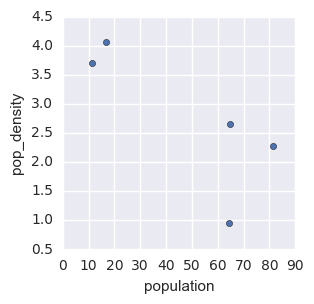

In [311]:
countries[['population', 'pop_density']].plot(kind='scatter', 
                                              x='population', 
                                              y='pop_density', figsize=(3,3));

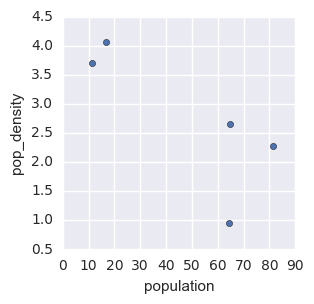

In [312]:
countries[['population', 'pop_density']].plot.scatter(x='population', y='pop_density', figsize=(3,3));

##### Barplot

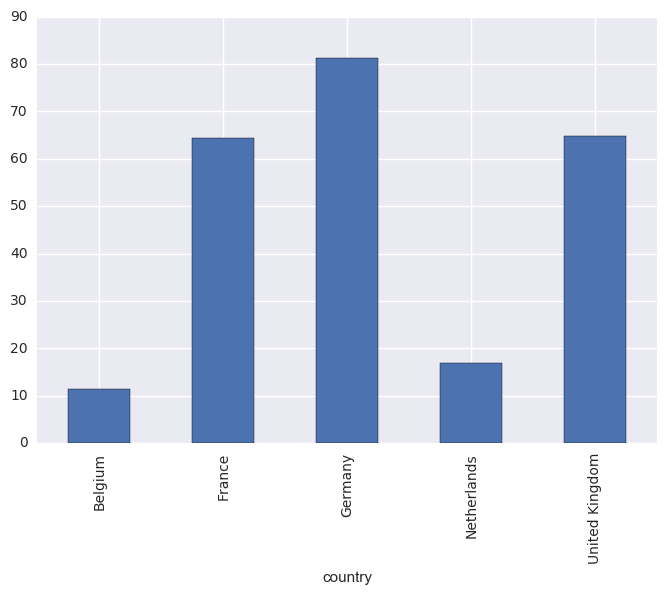

In [314]:
countries['population'].plot(kind='bar');

##### Scatterplot

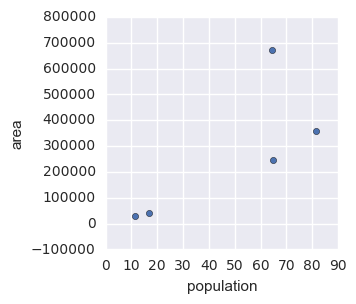

In [317]:
countries.plot(kind='scatter', x='population', y='area', figsize=(3,3 ));

In [320]:
[x for x in os.listdir(os.getcwd()) if 'jpeg' in x]

[]

In [321]:
plt.savefig('scatter1.jpeg')

In [322]:
[x for x in os.listdir(os.getcwd()) if 'jpeg' in x]

['scatter1.jpeg']

---------------------------------------------------------------------------------------------------------------------

### 2.5 Subsetting a DataFrame

*** --- 1 Column***: For a DataFrame, basic indexing selects the columns.

An individual column can be retrieved as a Series using `df['col']` or `df.col` 

This is especially helpful for creating boolean indexes.

In [323]:
my_df2

,floats,ints,strings,bools
v,0.1,0,A,True
w,0.2,1,B,False
x,0.3,2,C,True
y,0.4,3,D,True
z,0.5,4,E,False


#### Subsetting one column

In [324]:
my_df2['floats']

v    0.1
w    0.2
x    0.3
y    0.4
z    0.5
Name: floats, dtype: float64

In [325]:
my_df2[['floats']]

,floats
v,0.1
w,0.2
x,0.3
y,0.4
z,0.5


In [326]:
my_df2.floats
my_df2['floats']

v    0.1
w    0.2
x    0.3
y    0.4
z    0.5
Name: floats, dtype: float64

In [327]:
all(countries.area == countries['area'])

True

In [328]:
all(my_df2[['floats']] == my_df2['floats'])

False

*** --- 2+ Columns***: Multiple columns are retrieved as a DataFrame using a list of column names `df[['col1', 'col2']]` 

In [329]:
type(my_df2[['ints', 'strings']])

pandas.core.frame.DataFrame

In [330]:
countries[['area', 'population']]

,area,population
country,,
Belgium,30510,11.3
France,671308,64.3
Germany,357050,81.3
Netherlands,41526,16.9
United Kingdom,244820,64.9


---------------------------------------------------------------------------------------------------------------------

*** --- Rows***: can be retrieved by position or name by methods such as ***.ix***
It provides the label indexing facility.


This is a very powerful method that can subset the DataFrame in any way (using locations or index or ranges)


```
.loc and .iloc
.ix
.at and .iat
```

## Advaned Indexing - 1 [.loc and .iloc]

For more advanced indexing, you have some extra attributes:

***--- loc:*** selection by label

`Syntax: df.loc[[indices], [colnames]]`

`[indices]` could be specified as a list, splice (start : end) or using a boolean series.


In [331]:
countries

,area,capital,population,pop_density
country,,,,
Belgium,30510,Brussels,11.3,3.703704
France,671308,Paris,64.3,0.957832
Germany,357050,Berlin,81.3,2.276992
Netherlands,41526,Amsterdam,16.9,4.069739
United Kingdom,244820,London,64.9,2.650927


In [332]:
# Using a row index (before comma) and a column name (after comma)
countries.loc[['Germany', 'United Kingdom'], 
              ['area', 'capital']]

,area,capital
country,,
Germany,357050,Berlin
United Kingdom,244820,London


In [333]:
# Using a row index splice and a column index splice
countries.loc['Belgium':'Germany', :]

,area,capital,population,pop_density
country,,,,
Belgium,30510,Brussels,11.3,3.703704
France,671308,Paris,64.3,0.957832
Germany,357050,Berlin,81.3,2.276992


In [334]:
countries.loc['Belgium':'Germany', 'area':'population']

,area,capital,population
country,,,
Belgium,30510,Brussels,11.3
France,671308,Paris,64.3
Germany,357050,Berlin,81.3


#### Subsetting with Booleans

In [335]:
(countries['population'] > 50)

country
Belgium           False
France             True
Germany            True
Netherlands       False
United Kingdom     True
Name: population, dtype: bool

In [336]:
countries.loc[countries['population'] > 50, :]

,area,capital,population,pop_density
country,,,,
France,671308,Paris,64.3,0.957832
Germany,357050,Berlin,81.3,2.276992
United Kingdom,244820,London,64.9,2.650927


In [ ]:
countries.population > 50
# Created using the dataframe
# The index-value links are preserved

In [ ]:
Series([False, True, True, False, True])
# Arbit series
# Doesnt have the same index as the df

In [ ]:
countries.loc[countries.population > 50, :]

In [ ]:
countries.loc[Series([False, True, True, False, True]), :]
# Gives you an Indexing Error

### - The `reset_index()` method

In [337]:
countries

,area,capital,population,pop_density
country,,,,
Belgium,30510,Brussels,11.3,3.703704
France,671308,Paris,64.3,0.957832
Germany,357050,Berlin,81.3,2.276992
Netherlands,41526,Amsterdam,16.9,4.069739
United Kingdom,244820,London,64.9,2.650927


In [338]:
countries.reset_index(inplace=True)

In [339]:
countries

,country,area,capital,population,pop_density
0,Belgium,30510,Brussels,11.3,3.703704
1,France,671308,Paris,64.3,0.957832
2,Germany,357050,Berlin,81.3,2.276992
3,Netherlands,41526,Amsterdam,16.9,4.069739
4,United Kingdom,244820,London,64.9,2.650927


---

## Using Comprehensions to subset rows and columns.

In [340]:
['France' in x for x in countries.set_index('country').index]

[False, True, False, False, False]

In [341]:
[(('area' in x) or ('capital' in x)) for x in countries.columns]

[False, True, True, False, False]

In [ ]:
countries.loc[['France' in x for x in countries.set_index('country').index],
             [(('area' in x) or ('capital' in x)) for x in countries.columns]]

In [ ]:
# Using a boolean for rows and a list of column names
countries.loc[countries['population'] > 5, ['capital', 'area']]

## *** --- iloc:*** selection by position.

Selecting by position with iloc works similar as indexing numpy arrays

In [ ]:
countries

In [ ]:
# Using splices for both rows and columns
countries.iloc[1:4, 1:3]

> Note: The different indexing methods can also be used to assign data.

---------------------------------------------------------------------------------------------------------------------

## Advaned Indexing - 2 [using the ***.ix*** method]



`Syntax: df.ix[<specify-rows>, <specify-cols>]`

- Here, `specify-cols` could be done as a singular/list/splice of colname(s)
    - Additionally, we could even specify integer ranges (splices).

- Similarly, `specify-rows` can be done using indices (if you want to subset rows by name)
    - by using integer splices (if you want to subset by position)

In [ ]:
my_df2

In [ ]:
# Columns

# select a column by name
my_df2.ix[:, 'strings']

In [ ]:
# select multiple columns by name
my_df2.ix[:, ['strings', 'floats']] 

In [ ]:
# select columns by position
print my_df2.ix[:, 0:2] 

In [ ]:
# Subsetting Rows using integers and ix
print my_df2.ix[0, :] # first row
print my_df2.ix[2, :] # second row

In [ ]:
print my_df2.ix[0:2] # by position: returns the first 2 rows

In [ ]:
# Subsetting rows using labels and .ix

print my_df2.ix['x':'z'] # by index: returns the last three rows
# We can slice the DataFrame using an index object

In [ ]:
# Use the :: for stepping through rows
my_df2.ix[::-1, ['strings', 'ints']]

In [ ]:
my_df2

In [ ]:
my_df2.ix[0:5:2]

---

NOTE:

> The column returned when indexing a DataFrame is a view on the underlying
data, not a copy. Thus, any in-place modifications to the Series
will be reflected in the DataFrame. The column can be explicitly copied
using the Series’s copy method.

In [ ]:
cap = countries['capital']

In [ ]:
cap[1] = 'Paris'

In [ ]:
countries

---------------------------------------------------------------------------------------------------------------------

### 2.6 Reindexing
It is used to create a DF with the data _conformed_ to a new index.

If we subset a Series or DataFrame with an index object, 

the data is _rearranged_ to obey this new index and missing values are introduced wherever the data was not present

#### --- Reindexing a Series

In [ ]:
countries

In [ ]:
countries.set_index('capital', inplace=True)

In [ ]:
countries

In [ ]:
capital2 = ['Paris', 'Brussels', 'Munich', 'Amsterdam', 'Manchester', 'Madrid']

countries.loc[capital2, :].fillna('Info NA')

In [ ]:
countries.reindex(capital2)

## --- Reindexing a DataFrame

`Syntax: df.reindex(index=, columns=, fill_value=, method=)`

In [ ]:
frame = DataFrame(np.random.randn(9).reshape(3, 3), index=list('acd'), columns=list('zwx')); frame

In [ ]:
frame.reindex(list('abcde'))

In [ ]:
frame

In [ ]:
frame.reindex(index=list('abcde'), 
              columns=list('wxyz'))

In [ ]:
# ffill will copy values from the previous row where possible, and if an entire column is NaN, fill_value will populate it.
(frame
 .reindex(index=list('abcde'), columns=list('wxyz'),
          method='ffill',
          fill_value=0.1)
)

> NOTE: `reindex` is quite helpful to align dataFrames for merging/appending tasks

--------------------------------------------------------------------------------------------------------------------

## Binary Operations involving DataFrames: _Data Alignment by Index_

In [ ]:
df1 = DataFrame(data=np.arange(1, 13).reshape(4,3), index=list('abcd'), columns=list('pqr'))
df2 = DataFrame(data=np.arange(1, 13).reshape(3,4), index=list('abc'), columns=list('pqrs')) 
print 'df1', '\n', df1, '\n'
print 'df2', '\n', df2, '\n'
print 'df1 + df2', '\n', df1 + df2

***Note***: Alignments happen on both axes. No information is discarded by default

In [ ]:
# We could choose to get rid of or impute missing rows/columns
(df1 + df2).fillna(0)

---

<big>

## Task 1

- Import the data into Pandas '`train.csv`'
    - Report the shape of the table and the data type of each column.

- Subset the data to retain only the passengers that survived. Name this object 'Survivors'
    - Within the 'survivors' find the summary statistics of the 'Age' and 'Fare' variables.

- Subset the data to retain only Female passengers.
    - Find out how many females over the age of 30 survived.

- Are there any missing values in the Age column?    
    - Draw a histogram of this column.
    - Replace missing values with a) Mean b) Median
    - Report the new summary statistics on this variable
---    

In [344]:
df_titanic.loc[df_titanic['Survived'] == 1, ['Age', 'Fare']].describe()

,Age,Fare
count,290.000000,342.000000
mean,28.343690,48.395408
std,14.950952,66.596998
min,0.420000,0.000000
25%,19.000000,12.475000
50%,28.000000,26.000000
75%,36.000000,57.000000
max,80.000000,512.329200


In [349]:
(df_titanic.loc[((df_titanic['Sex'] == 'female') & (df_titanic['Survived'] == 1)) , 'Age'] > 30).value_counts()

False    150
True      83
Name: Age, dtype: int64

In [355]:
df_titanic['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [356]:
df_titanic['Age'].isnull().sum()

177

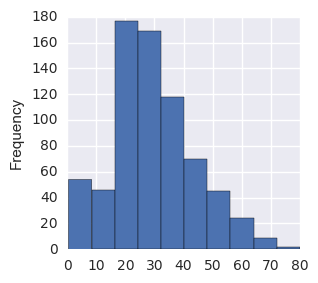

In [363]:
df_titanic['Age'].plot.hist(figsize=(3, 3));

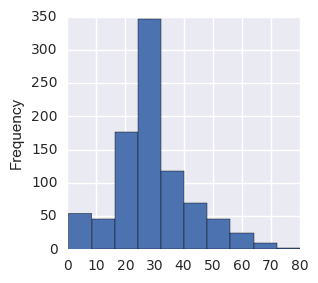

In [365]:
age_mean = df_titanic['Age'].mean()
df_titanic['Age'].fillna(age_mean).plot.hist(figsize=(3, 3));
# replace missings with mean

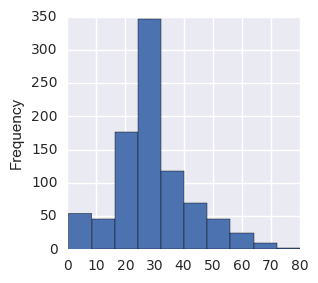

In [366]:
df_titanic['Age'].fillna(df_titanic['Age'].median()).plot.hist(figsize=(3, 3));

---
### 2.7 Deleting Rows or Colums

This can be done using the `drop` method and specifying row indices or column names.

To drop **rows**

`Syntax: df.drop(indices-as-a-list)`

To drop **columns**

`Syntax: df.drop(colnames-as-a-list, axis=1)`


Parameters 

- axis (controls row/col deletion)
- inplace (changes to be permanent or not)

In [ ]:
df1

In [ ]:
# Delete the row with index 'b'
df1.drop('b', inplace=True); df1

In [ ]:
# Delete the column with name 'q'
df1.drop('q', axis=1, inplace=True); df1

In [ ]:
df2

In [ ]:
# Remove multiple rows
df2.drop(['a', 'b'], inplace=True); df2

---
## Using Boolean Indexing to conditionally replace data

In [ ]:
print df1, '\n', df2

In [ ]:
df3 = df1 + df2

In [ ]:
df3

In [ ]:
df3.isnull()

In [ ]:
df3[df3.isnull()] = -99

In [ ]:
df3

In [ ]:
df3[df3>8] = 99; df3

In [ ]:
d11 = DataFrame(np.random.randn(25).reshape(5,5), 
index=list('abcde'), 
columns=list('vwxyz')).round(2); print d11

In [ ]:
d11.quantile(np.arange(0.25, 1, 0.25))

In [ ]:
d11.describe().round(2)

---------------------------------------------------------------------------------------------------------------------

## 2.8 Apply functions to each element/rows or columns of a DataFrame

Using 

- **`s.map()`**, apply a func to each element of a Series
- **`df.applymap()`** apply a func to each element of a DF
- **`df.apply()`** apply a func to rows/columns of a DF

> Lambda functions are also known as ANONYMOUS functions because they typically do not have a name.

- The are used extensively in Python, and even more with the map, applymap and apply functions

In [369]:
DataFrame(arr_1)

,0,1,2,3,4,5,6,7
0,1.05,1.01,0.71,1.25,-0.24,-0.61,2.03,-0.56
1,0.16,-0.05,-1.23,-0.06,0.72,0.61,-0.66,-0.52
2,1.31,-2.03,-0.29,-0.05,0.67,-0.54,-0.70,-2.01
3,0.62,0.48,0.51,-0.64,-2.21,-1.31,-1.01,1.21
4,0.26,1.18,-1.22,0.66,0.73,0.99,-1.78,0.81
5,-0.32,0.06,1.86,-0.84,-0.87,1.37,-0.04,-0.75
6,0.46,-0.86,0.01,-0.63,0.88,-1.69,-0.34,-0.27


In [370]:
DataFrame(arr_1).applymap(lambda x: 'neg' if x < 0 else 'pos')
# a function that checks if value is less than 0, then says 'neg' for negative or 'pos' for positive

,0,1,2,3,4,5,6,7
0,pos,pos,pos,pos,neg,neg,pos,neg
1,pos,neg,neg,neg,pos,pos,neg,neg
2,pos,neg,neg,neg,pos,neg,neg,neg
3,pos,pos,pos,neg,neg,neg,neg,pos
4,pos,pos,neg,pos,pos,pos,neg,pos
5,neg,pos,pos,neg,neg,pos,neg,neg
6,pos,neg,pos,neg,pos,neg,neg,neg


In [376]:
# Named Function
def addTen(x):
    return x + 10

In [377]:
addTen(1)

11

---

In [379]:
# Create a dataframe to work with
df8 = DataFrame(np.random.randn(25).reshape(5, 5), 
                index=list('abcde'), 
                columns=list('vwxyz')).round(2); df8

,v,w,x,y,z
a,3.09,0.32,-0.21,-0.36,0.09
b,-0.38,-1.90,-1.12,-1.31,0.62
c,-0.52,0.07,0.94,-0.77,-0.27
d,-0.08,-0.96,-1.21,0.19,-1.55
e,0.84,0.23,2.89,-0.65,-0.08


## 2.8.1 Apply a function to each element

--- Calling ***numPy ufuncs*** on DataFrame objects will apply the function to each element

> ufuncs work on a single argument

In [384]:
np.abs(df8.values)

array([[ 3.09,  0.32,  0.21,  0.36,  0.09],
       [ 0.38,  1.9 ,  1.12,  1.31,  0.62],
       [ 0.52,  0.07,  0.94,  0.77,  0.27],
       [ 0.08,  0.96,  1.21,  0.19,  1.55],
       [ 0.84,  0.23,  2.89,  0.65,  0.08]])

In [386]:
np.abs(df8)

1000 loops, best of 3: 214 µs per loop


In [387]:
df8.applymap(np.abs)

100 loops, best of 3: 1.79 ms per loop


In [ ]:
%%timeit
np.abs(df8)
## This is an example of a VECTORIZED OPERATION

In [ ]:
%%timeit
df8.applymap(np.abs)

> It is possible to ***apply a udf to each element*** in a Series (using **`map`**) or a DataFrame (using **`applymap`**)

In [392]:
# Write a function that formats a number to 2 decimal places
format8 = lambda x: '%.2f' %x

# SAME AS
# def format8(x):
#     return '%.2f' %x

format8(3.1341)

'3.13'

In [393]:
df8.applymap(format8)

,v,w,x,y,z
a,3.09,0.32,-0.21,-0.36,0.09
b,-0.38,-1.90,-1.12,-1.31,0.62
c,-0.52,0.07,0.94,-0.77,-0.27
d,-0.08,-0.96,-1.21,0.19,-1.55
e,0.84,0.23,2.89,-0.65,-0.08


---
## 2.8.2 Apply a udf to each row/column

Using the `.apply(func, axis=)` method to a DataFrame does this

In [ ]:
df8.mean()

In [399]:
%timeit df8.mean()

The slowest run took 6.43 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 137 µs per loop


In [ ]:
df8.apply(mean, axis=0)

In [400]:
%timeit df8.apply(mean, axis=0)

The slowest run took 5.66 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 874 µs per loop


In [407]:
df8

,v,w,x,y,z
a,3.09,0.32,-0.21,-0.36,0.09
b,-0.38,-1.90,-1.12,-1.31,0.62
c,-0.52,0.07,0.94,-0.77,-0.27
d,-0.08,-0.96,-1.21,0.19,-1.55
e,0.84,0.23,2.89,-0.65,-0.08


In [406]:
df8.max(axis=1)
# apply is implied

a    3.09
b    0.62
c    0.94
d    0.19
e    2.89
dtype: float64

In [408]:
df8.apply(max, axis=1)
# apply is explicitly mentioned

a    3.09
b    0.62
c    0.94
d    0.19
e    2.89
dtype: float64

In [410]:
df8.apply(lambda x: (x.max() - x.min()), axis=0)

v    3.61
x    4.10
dtype: float64

---

### Using different functions with `apply()`

---
<big>

When you write a lambda function to work with apply on a dataframe, remember

1. The input to the function will be a SERIES.
2. The output can be a number or a series.

---

In [411]:
# Use a general function that returns multiple values
def func8(x):
    return Series([x.min(), x.mean(), x.max()], 
                  index=['MIN.', 'MEAN.', 'MAX.'])

In [414]:
s_1 = Series(np.random.randn(10))

In [415]:
func8(s_1)

MIN.    -1.371894
MEAN.   -0.222638
MAX.     0.880871
dtype: float64

In [416]:
df8

,v,w,x,y,z
a,3.09,0.32,-0.21,-0.36,0.09
b,-0.38,-1.90,-1.12,-1.31,0.62
c,-0.52,0.07,0.94,-0.77,-0.27
d,-0.08,-0.96,-1.21,0.19,-1.55
e,0.84,0.23,2.89,-0.65,-0.08


In [417]:
df8.apply(func8)

,v,w,x,y,z
MIN.,-0.52,-1.900,-1.210,-1.31,-1.550
MEAN.,0.59,-0.448,0.258,-0.58,-0.238
MAX.,3.09,0.320,2.890,0.19,0.620


---

## Big Task 

---

Create a function called DESCRIBE_X that takes as input a Series, 
and produces a series containing

- `min, max, sum, mean, std, missings, nonmissings, skew, kurtosis`
- `percentiles - as specified by the user`

---

`DESCRIBE_X(s_1, percentiles=[0.1, 0.3, 0.92, 0.99]`

---

Output

min
max
sum
mean
std
0.1
0.3
0.92
0.99

---

Then, apply this function to the rows, columns of arr_1 as a DataFrame.

---



## Task 2

- Define a function call 'Standardizing' which works on a series as:
    - Find the mean and standard deviation of the series
    - Subtract each value of the series with the mean
    - Divide the result with the standard deviation
    - Apply this function to each numerical column (int or float) of the Titanic Dataset
    
---

## Revision Task

Create a 500 x 10 matrix/DataFrame filled with random numbers.
Name the columns as Col_1 ... Col_10

Declare a function that operates on a Series (hence row or column) and returns the square root of the sum of squares of the min and max numbers in each

1. Row
2. Column


---

## 2.9 Sorting 

** 2.9.1 Sorting a Series ** 

To sort a series on its index, use 
- `my_series.sort_index()`

To sort a series on its values, use 
- `my_series.sort_values(ascending=<bool>)`

In [ ]:
# Create a Series with explicit index 
s9 = Series(np.random.randint(0, 50, 5), 
            index=list('dcbae')); s9

In [ ]:
s9.index

In [ ]:
s9.values

In [ ]:
# Sorting on the index
s9.sort_index(ascending=False)

In [ ]:
# Sorting on the values 
s9.sort_values(ascending=False, inplace=True)

In [ ]:
s9

---
## ** 2.9.2 Sorting a DataFrame**

Here we use the `sort_index()` method and specify what columns to sort on using `by=`, and the order of sorting

In [418]:
d9 = DataFrame(np.random.randint(0, 100, 30).reshape(10, 3), 
               index=list('abcdefghij'), 
               columns=list('prq')); d9

,p,r,q
a,42,32,27
b,35,61,72
c,14,12,99
d,32,98,9
e,82,98,67
f,2,66,39
g,70,29,78
h,59,7,44
i,35,11,66
j,22,55,92


In [421]:
d9.sort_values(by='p', ascending=False, inplace=True); d9

,p,r,q
e,82,98,67
g,70,29,78
h,59,7,44
a,42,32,27
b,35,61,72
i,35,11,66
d,32,98,9
j,22,55,92
c,14,12,99
f,2,66,39


In [ ]:
d9.sort_values(by=['p', 'q'], ascending=False, inplace=False)

In [425]:
# d9.sort_index? 
# Sort DataFrame either by labels (along either axis) or by the values in a column

d9.sort_index(axis=0)

,p,r,q
a,42,32,27
b,35,61,72
c,14,12,99
d,32,98,9
e,82,98,67
f,2,66,39
g,70,29,78
h,59,7,44
i,35,11,66
j,22,55,92


In [428]:
df_titanic.sort_values(by=['Age', 'Pclass'], ascending=False)[['Name','Age', 'Pclass']][5:15]

,Name,Age,Pclass
672,"Mitchell, Mr. Henry Michael",70.0,2
745,"Crosby, Capt. Edward Gifford",70.0,1
33,"Wheadon, Mr. Edward H",66.0,2
280,"Duane, Mr. Frank",65.0,3
54,"Ostby, Mr. Engelhart Cornelius",65.0,1
456,"Millet, Mr. Francis Davis",65.0,1
438,"Fortune, Mr. Mark",64.0,1
545,"Nicholson, Mr. Arthur Ernest",64.0,1
483,"Turkula, Mrs. (Hedwig)",63.0,3
275,"Andrews, Miss. Kornelia Theodosia",63.0,1


** Reordering rows or columns **

In [ ]:
# without arguments, it will sort the index of the dataframe
d9.sort_index()

In [ ]:
# To sort column names
d9.sort_index(axis=1)

** Sorting on values **

In [ ]:
# Sort the data by the values of a column
d9.sort_values(by='q', ascending=False)

In [ ]:
# Sort the data by the values of 2 columns
d9.sort_values(by=['p', 'r'], ascending=False)

---
## 2.10 Ranking

This can be done by calling the `.rank()` method on a Series

`Syntax: obj.rank(axis=, ascending=, method=)`

Here, `method` refers to the method used to break ties if different elements have the same values.

In [429]:
s9 = Series(np.random.randint(0, 100, 5))

In [430]:
s9

0    41
1    96
2    18
3    23
4    11
dtype: int64

In [431]:
s9.rank()
# .astype(int) - 1

0    4.0
1    5.0
2    2.0
3    3.0
4    1.0
dtype: float64

In [432]:
# Create a series
s1 = Series(np.random.randint(0, 100, 10))

In [433]:
s1

0    83
1    72
2    71
3     9
4     7
5    49
6    22
7    33
8    26
9     5
dtype: int64

In [434]:
s1.rank(ascending=False)

0     1.0
1     2.0
2     3.0
3     8.0
4     9.0
5     4.0
6     7.0
7     5.0
8     6.0
9    10.0
dtype: float64

In [435]:
# Create a dataframe with series, ranks as the 2 columns
DataFrame({'a': s1, 'b': s1.rank(ascending=False)})

,a,b
0,83,1.0
1,72,2.0
2,71,3.0
3,9,8.0
4,7,9.0
5,49,4.0
6,22,7.0
7,33,5.0
8,26,6.0
9,5,10.0


---------------------------------------------------------------------------------------------------------------------

## 2.11 Descriptive Statistics

** Categorical Data **

- Calling describe() on a Categorical object shows count, # of unique, mode, mode's frequency

In [436]:
print Series(list('abcxyzbbc'))

Series(list('abcxyzbbc')).describe()

0    a
1    b
2    c
3    x
4    y
5    z
6    b
7    b
8    c
dtype: object


count     9
unique    6
top       b
freq      3
dtype: object

In [437]:
Series(list('abc')*4).describe()

count     12
unique     3
top        b
freq       4
dtype: object

In [439]:
df_titanic['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

---
### ** Numeric Data **

Pandas objects have a set of common math/stat methods that extract

--- a single value from a Series

--- a Series from a DataFrame (along a specified axis)

Methods include:

`count, sum, mean, median, min/max, idxmin/idxmax, skew, kurt, cumsum, cumprod, pct_change` and more.

> Note that these methods would be applied over each row/column as specified and results collated

In [ ]:
d11 = DataFrame(np.random.randint(0, 100, 25).reshape(5, 5), 
                index=list('abcde'), 
                columns=list('vwxyz')); print d11

In [ ]:
# Getting colsums is as simple as calling the .sum() method of a DataFrame
print d11.sum()
print d11.mean()

In [ ]:
# Working on rows would require you to pass axis=1 to the .sum() method
d11.sum(axis=1)

> Note that missing values are ignored by default. Pass `skipna=False` to disable this.

In [ ]:
# Find the min/max for each column/row
d11.min(axis=1)

---
## Task 2

- is .sum() faster or using np.sum in an apply function

---

In [ ]:
%timeit d11.apply(lambda x: np.sum(x))

In [ ]:
%timeit d11.sum()

### Locate the min and max

In [ ]:
# Where does this value occur?
d11['v'].idxmin()

In [ ]:
d11.ix['d'].idxmax()

### `describe()` works on all numeric (int or float) columns in a DataFrame

In [ ]:
d11.describe()

In [ ]:
titanic.dtypes

In [ ]:
titanic.describe()

### Percentiles

In [ ]:
# Calculate quantiles for each column 
titanic.quantile(np.arange(0.80, 1, 0.05))

---
## Task 3

In [ ]:
(titanic
 .describe()
 .append(titanic.quantile(np.arange(0.80, 1, 0.05))))

---
### Two Numerical Variables: Correlation

DataFrames have `.corr()` and `.cov()` methods that return a full correlation/covariance matrix as a DataFrame

In [440]:
import seaborn as sns

## Uncorrelated Variables

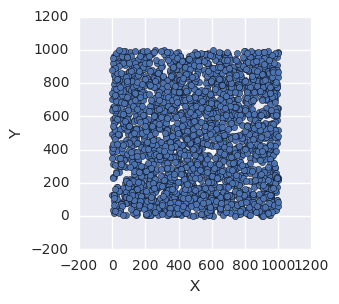

In [443]:
(DataFrame(np.random.randint(0, 1000, 5000).reshape(2500, 2), 
          columns=['X', 'Y'])
.plot.scatter(x='X', y='Y', figsize=(3, 3)));

In [444]:
(DataFrame(np.random.randint(0, 1000, 5000).reshape(2500, 2), 
          columns=['X', 'Y'])).corr()

,X,Y
X,1.000000,0.018297
Y,0.018297,1.000000


## Positively Correlated

In [446]:
X = np.random.randint(0, 1000, 2500)
Y = 4 * X + 25 + 1000 * np.sin(X) + np.random.randint(0, 200, 2500)

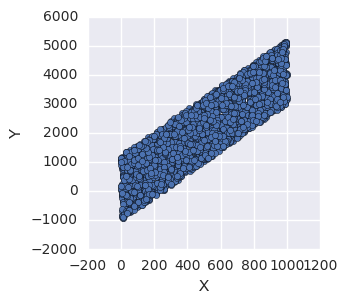

In [448]:
DataFrame({'X': X, 'Y': Y}).plot.scatter(x='X', y='Y', figsize=(3, 3));

In [449]:
DataFrame({'X': X, 'Y': Y}).corr()

,X,Y
X,1.000000,0.857733
Y,0.857733,1.000000


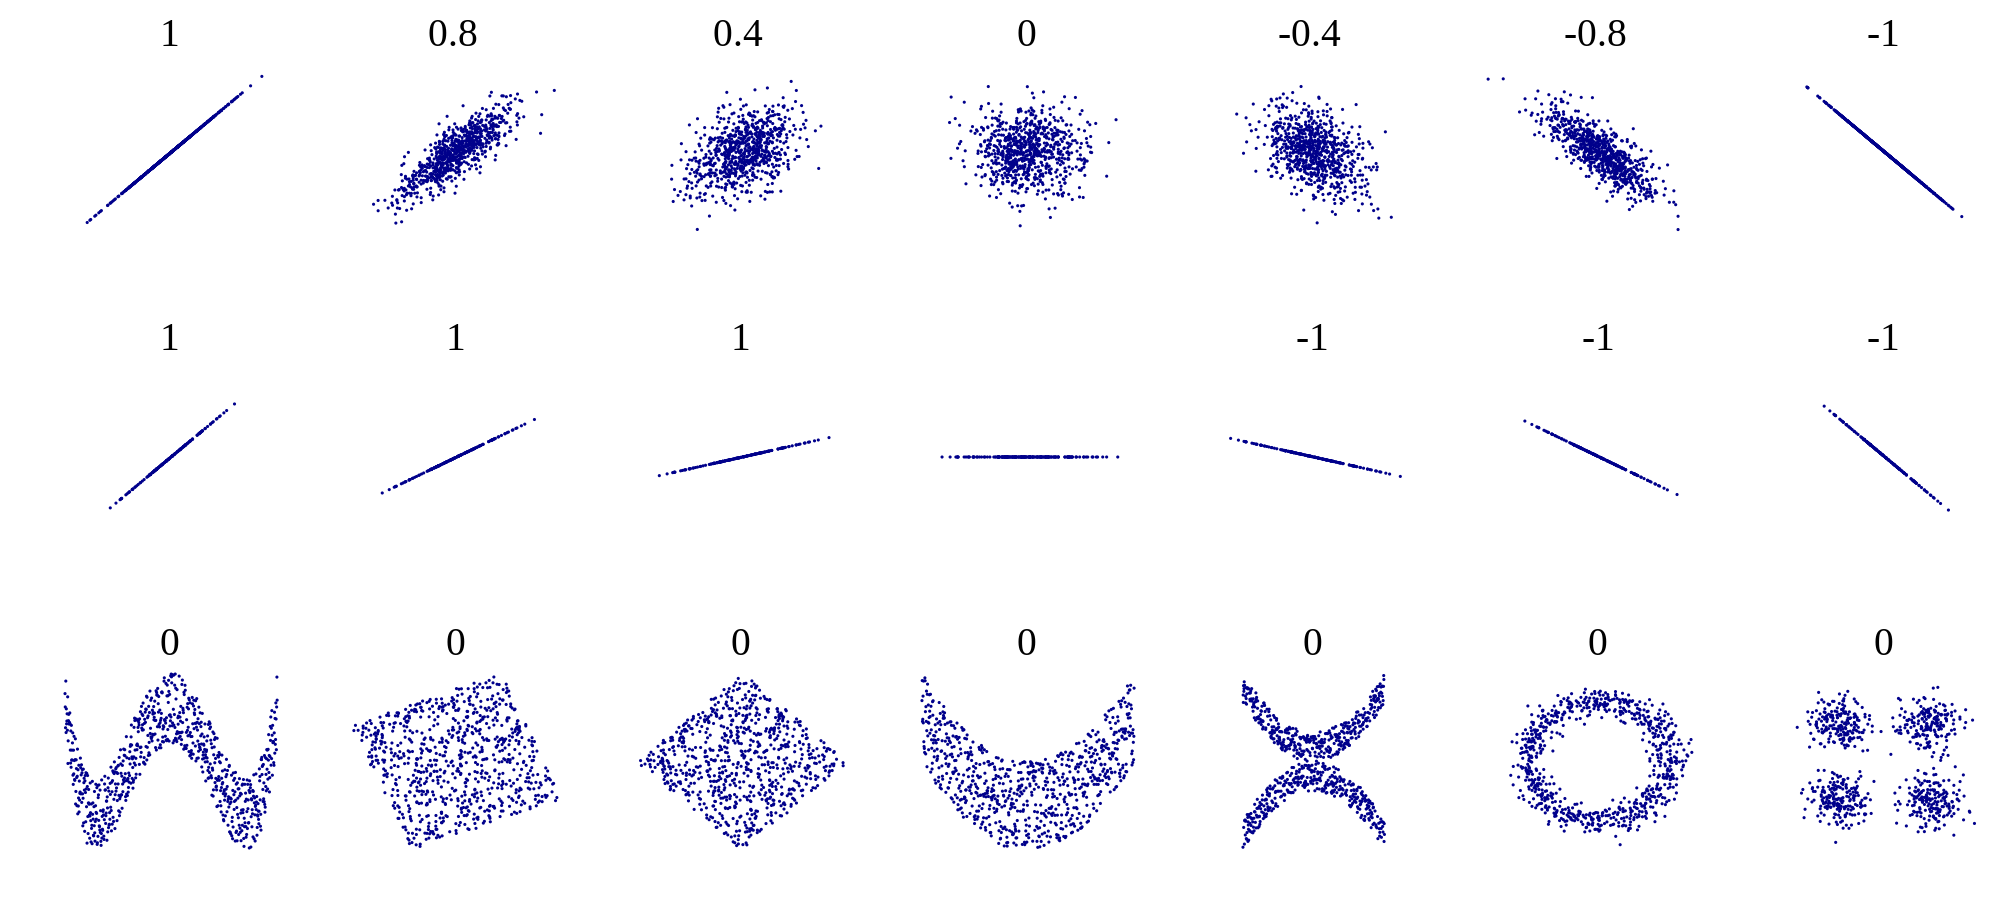

In [450]:
from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/2000px-Correlation_examples2.svg.png")

In [ ]:
d11

In [ ]:
sns.heatmap(titanic[titanic.describe().columns.tolist()[-4:]].apply(stddg).corr())

In [ ]:
# The Correlation Matrix
sns.heatmap(d11.corr().round(2))

In [ ]:
sns.heatmap(titanic[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].fillna(0).corr())

---
## Task 4:
    
- Find the correlation matrix for all numeric columns in Titanic
- print only the correlation values that are above 0.7

---------------------------------------------------------------------------------------------------------------------

### 2.12 More Methods for Pandas objects

Now we look at methods for unique values (`unique`), frequency tables (`value_counts`), membership (`isin`)

In [ ]:
# Getting distinct values in a Series
s12 = Series(list('the quick brown fox jumped over the lazy dog'))

set(s12) 
#  or
s12.unique()

In [ ]:
s12.nunique()

In [ ]:
titanic.dtypes

In [ ]:
titanic.Survived.value_counts()

### the `isin` method

In [ ]:
# isin returns a boolean that can be used to index the original value
s12.isin(list('pqrst'))[:10]

In [ ]:
print titanic.Sex.head()

titanic.Sex.head().isin(['male'])

In [ ]:
colours = Series(['red', 'blue', 'white', 'green', 'black', 'white', None])

print colours.isin(['white', 'blue', None])

---------------------------------------------------------------------------------------------------------------------

## Difference between `None` and `np.nan`

In [ ]:
type(None)

In [ ]:
type(np.nan)

---
## 2.12 Handling Missing Data

Pandas treats the numpy `NaN` and the Python `None` as missing values.

--- These can be **detected** in a Series or DataFrame using **`obj.notnull()`**,  **`obj.isnull()`** which returns a boolean.

--- **To filter out missing data** from a Series, or to remove rows (default action) or columns with missing data in a DataFrame, we use **`obj.dropna()`**

--- Missing Value **imputation** is done using the **`obj.fillna()`** method.

In [ ]:
# Create a string Series and set some values to missing
s12 = Series(['abc', 'pqr', np.nan, 'xyz', np.nan, 'ijk', None])

s12

In [ ]:
# Detect missing values
s12.isnull()

In [ ]:
# Replace missing values with 0
s12.fillna(0)

In [ ]:
s12.fillna('missing')

In [ ]:
# Create a numeric Series and set a few values to missing
s13 = Series(np.random.randint(0, 50, 8), index=list('abcdefgh'))
s13[::2] = np.nan
s13

In [ ]:
# Fill with median

s13.fillna(s13.median())
# We could use 0, or .mean() or some arbitrary method

In [ ]:
s13.dropna()

---------------------------------------------------------------------------------------------------------------------

## 3. Implementing Split-Apply-Combine: The _groupby_ method
+ You may group along the rows or columns.
+ Returns the groupby object that stores info on how to split the data
+ To this object, we implement Aggregations (reduce size of data) or Transformations (no change in size) or Apply

In [ ]:
from IPython.display import Image
Image("http://i.imgur.com/yjNkiwL.png")

In [ ]:
df = DataFrame({'floats': np.random.randn(20), 
                'string': list('a' * 4 + 'b' * 6 + 'c' * 3 + 'd' * 7)})

In [ ]:
df.groupby('string').mean()

In [ ]:
grouped = df.groupby('string')

In [ ]:
type(grouped)

In [ ]:
len(grouped)

In [ ]:
for tab in grouped:
    print tab[1]['floats'].mean(), '\n'

In [ ]:
# Specialized functions on grouped object directly
print grouped.sum()
print grouped.mean()
print grouped.median()

# try min, max, idxmin, idxmax and so on

---
### An example using the Titanic Data

In [ ]:
titanic.Embarked.value_counts()

In [ ]:
titanic.groupby('Embarked').apply(lambda x: x.loc[:, ['Name', 'Age', 'Sex']].head(3))

In [ ]:
titanic.groupby('Sex').apply(lambda x: x[['Age', 'Fare']].mean())

In [ ]:
# Top two Fares for Sex x Embarked categories
titanic.set_index('Name').groupby(['Sex', 'Embarked']).apply(lambda x: x['Fare'].sort_values(ascending=False).head(2))

In [ ]:
pd.pivot_table(data=titanic.query("Survived == 0"), 
               index='Embarked', 
               columns='Sex', 
               values='Fare', 
               aggfunc=np.mean).plot.barh()

In [ ]:
pd.pivot_table(data=titanic.query("Survived == 1"), 
               index='Embarked', 
               columns='Sex', 
               values='Fare', 
               aggfunc=np.mean)

----
## Reshaping your data  with  `stack, unstack and pivot_table`

### LONG to WIDE

In [ ]:
df = pd.DataFrame({'A': list('x' * 5) + list('y' * 5), 
                   'B': list('abcde' * 2),
                   'C': np.random.randint(0, 100, 10)})
df

In [ ]:
df.set_index(['A', 'B']).unstack()

> To use stack/unstack, we need the values we want to shift from rows to columns or the other way around as the index

### WIDE to LONG

In [ ]:
DataFrame(np.random.randint(0, 100, 25).reshape(5, 5), 
          index=list('abcde'), 
          columns=list('vwxyz')).stack()

In [ ]:
pd.pivot_table(df, index='A', columns='B')

In [ ]:
pd.pivot_table(df, index='A', aggfunc=np.mean)

In [ ]:
df.groupby('A').mean()